In [16]:
import numpy as np
from cmath import exp
from math import sqrt,pi
def diffrac(k, z, ratio, xy_range, XX, YY, U0):
    # Calculate rr
    rr = np.sqrt(XX**2 + YY**2 + z**2)
    
    # Calculate G
    G = 1 / (2 * np.pi) * np.exp(-1j * k * rr) / rr**2 * z * (1 / rr + 1j * k)
    
    # Create U0 with zeros
    U1 = np.zeros((2 * xy_range, 2 * xy_range), dtype=complex)
    U1[(xy_range // 2):((xy_range // 2) + xy_range),
       (xy_range // 2):((xy_range // 2) + xy_range)] = U0
    
    # Compute FFT of U0 and G
    fft_U1 = np.fft.fft2(U1)
    fft_G = np.fft.fft2(G)
    
    # Multiply FFT of U0 and G
    fft_U = fft_U1 * fft_G
    
    # Compute inverse FFT and shift
    U = np.fft.ifftshift(np.fft.ifft2(fft_U)) / ratio**2
    
    # Extract Eout from U
    Eout = U[(xy_range // 2):((xy_range // 2) + xy_range),
            (xy_range // 2):((xy_range // 2) + xy_range)]
    
    return Eout

(1)平行光照明直径为10微米小孔后，从z=0.1μm到z=100 μm之间的衍射形态。提供源代码和Y-Z平面内的能量分布

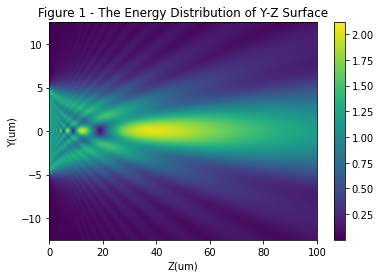

In [17]:
wavelength = 0.633
k = 2 * np.pi / wavelength

# Parameter of hole
diameter = 10
radius = diameter / 2

# Parameter of range
xy_range = 25
ratio = 10
XY_range = xy_range * ratio
z_range = 100
Z_range = z_range * ratio
x = ((np.arange(XY_range) + 1) - (1 + XY_range) / 2) / ratio
y = x
xx, yy = np.meshgrid(x, y)
r = np.sqrt(xx**2 + yy**2)
# Extension
X = np.concatenate((x[0] - x[XY_range-1::-1], x - x[0]))
Y = np.concatenate((y[0] - y[XY_range-1::-1], y - y[0]))
XX, YY = np.meshgrid(X, Y)

# Initialization of U0
U0 = np.zeros_like(r)
U0[r <= radius] = 1

intensity = np.zeros((XY_range, XY_range, Z_range))

for i, z in enumerate(np.arange(0.1, 100.1 , 0.1)):
    U = diffrac(k, z, ratio, XY_range, XX, YY, U0)
    intensity[:, :, i] = np.abs(U)

#slice intensity to get Y-Z plane
intensity_yz = np.zeros((XY_range, Z_range))
intensity_yz[:,:]=intensity[XY_range//2,:,:]

from matplotlib import pyplot as plt
plt.figure(1)
plt.imshow(intensity_yz, extent=[0, z_range, -xy_range/2, xy_range/2], aspect='auto')
plt.colorbar()
plt.title('Figure 1 - The Energy Distribution of Y-Z Surface')
plt.xlabel('Z(um)')
plt.ylabel('Y(um)')
plt.show()

（2）一个λ=633nm的平行光，照明直径为100微米的圆形位相片，其位相分布为exp[-ikr2/(2f)]，k=2pi/λ，f=50微米，r2=x2+y2。模拟从z=30μm到z=70 μm之间YZ平面内的衍射能量分布。提供源代码和Y-Z平面内的能量分布。

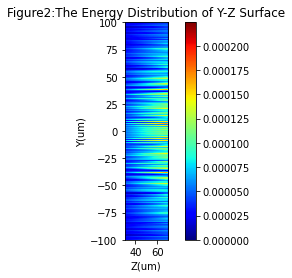

In [19]:
#Parameters of hole
diameter = 100
radius = diameter / 2

# Parameters of range
xy_range = 200
XY_range = xy_range * ratio
z_min = 30
z_max = 70
z_range = z_max - z_min + 1
Z_range = z_range * ratio

x = ((np.arange(XY_range) + 1) - (1 + XY_range) / 2) 
y = x
xx, yy = np.meshgrid(x, y)
r = np.sqrt(xx**2 + yy**2)
# Extension
X = np.concatenate((x[0] - x[XY_range-1::-1], x - x[0]))
Y = np.concatenate((y[0] - y[XY_range-1::-1], y - y[0]))
XX, YY = np.meshgrid(X, Y) 

# Initialization of object
hole = np.zeros_like(r)
hole[r <= radius] = 1

f = 50
phase = np.exp(-1j * k / (2 * f) * r**2)
U0 = hole * phase

intensity = np.zeros((XY_range, XY_range, Z_range))

for i, z in enumerate(np.arange(z_min, z_max+0.1, 0.1)):
    U = diffrac(k, z, ratio, XY_range, XX, YY, U0)
    intensity[:, :, i] = np.abs(U)

#slice intensity to get Y-Z plane
intensity_yz=intensity[xy_range//2,:,:]

plt.imshow(np.real(intensity_yz), extent=[z_min, z_max, -xy_range/2, xy_range/2], cmap='jet')
plt.colorbar()
plt.title('Figure2:The Energy Distribution of Y-Z Surface')
plt.xlabel('Z(um)')
plt.ylabel('Y(um)')
plt.show()

